In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train=pd.read_csv("training_data_csv.csv")

In [3]:
train.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1


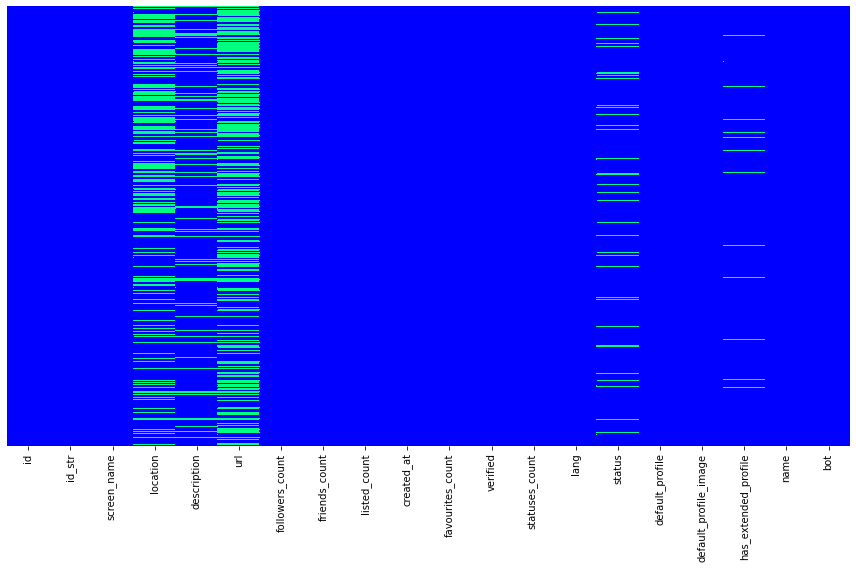

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='winter')
plt.tight_layout()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2797 non-null   float64
 1   id_str                 2797 non-null   object 
 2   screen_name            2797 non-null   object 
 3   location               1777 non-null   object 
 4   description            2394 non-null   object 
 5   url                    1455 non-null   object 
 6   followers_count        2797 non-null   int64  
 7   friends_count          2797 non-null   int64  
 8   listed_count           2797 non-null   int64  
 9   created_at             2797 non-null   object 
 10  favourites_count       2797 non-null   int64  
 11  verified               2797 non-null   bool   
 12  statuses_count         2797 non-null   int64  
 13  lang                   2797 non-null   object 
 14  status                 2508 non-null   object 
 15  defa

In [6]:
train['description']=train['description'].fillna('No Description')
train['status']=train['status'].fillna('No Status')

In [7]:
train['sname_bin'] = train.screen_name.str.contains('bot', case=False, na=False) 
train['name_bin'] = train.name.str.contains('bot', case=False, na=False)
train['des_bin'] = train.description.str.contains('bot', case=False, na=False)
train['stat_bin'] = train.status.str.contains('bot', case=False, na=False)

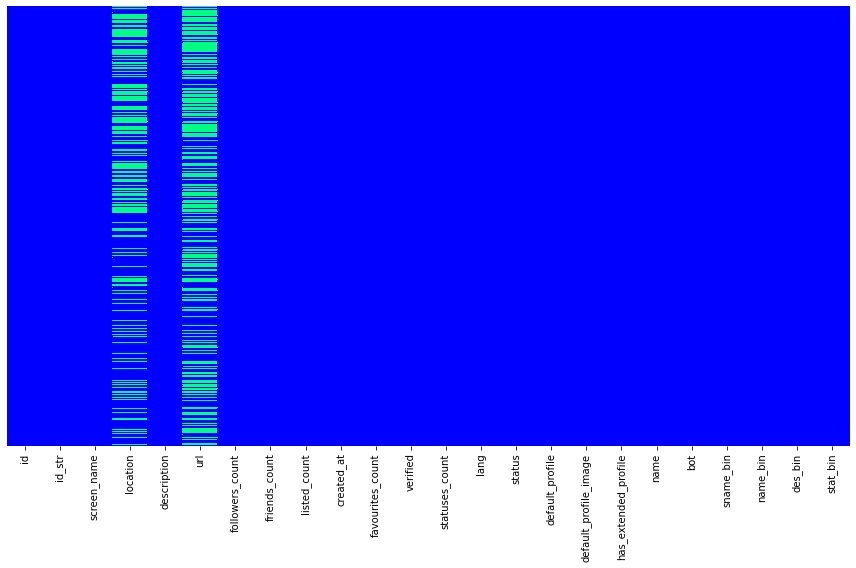

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='winter')
plt.tight_layout()

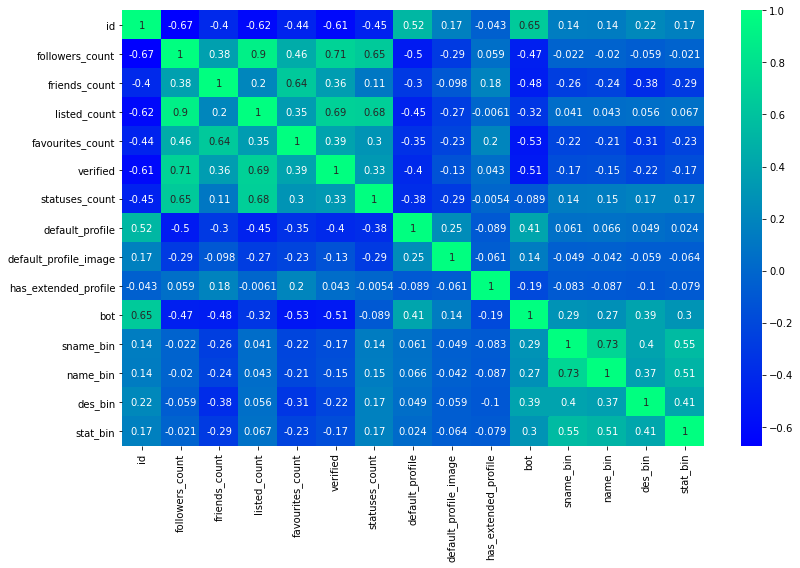

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(method='spearman'), cmap='winter', annot=True)
plt.tight_layout()
plt.show()

In [11]:
train['has_extended_profile']=train['has_extended_profile'].map({False:0,True:1,np.nan:0})
train['verified']=train['verified'].map({False:0,True:1})
train['default_profile']=train['default_profile'].map({False:0,True:1})
train['default_profile_image']=train['default_profile_image'].map({False:0,True:1})
train['sname_bin']=train['sname_bin'].map({False:0,True:1})
train['name_bin']=train['name_bin'].map({False:0,True:1})
train['des_bin']=train['des_bin'].map({False:0,True:1}) 
train['stat_bin']=train['stat_bin'].map({False:0,True:1})

In [12]:
features=['followers_count','friends_count','listed_count','favourites_count','verified','statuses_count','default_profile', 'default_profile_image', 'has_extended_profile','sname_bin', 'name_bin', 'des_bin', 'stat_bin']

In [13]:
class NeuralNetwork(object):
    
    def __init__(self):
        pass
    
    def initialize_parameters(self,layer_dims):
        param={}
        L=len(layer_dims)
        for l in range(1,L):
            param['W'+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
            param['b'+str(l)]=np.zeros((layer_dims[l],1))
        return param
    
    def initialize_velocity(self,parameters):
        L = len(parameters) // 2
        v = {}
        
        for l in range(L):
            v["dW" + str(l+1)] = np.zeros(parameters['W'+str(l+1)].shape)
            v["db" + str(l+1)] = np.zeros(parameters['b'+str(l+1)].shape)
        return v
    
    def initialize_adam(self,parameters) :
        L = len(parameters) // 2 
        v = {}
        s = {}
        for l in range(L):
            v["dW" + str(l+1)] = np.zeros(parameters['W'+str(l+1)].shape)
            v["db" + str(l+1)] = np.zeros(parameters['b'+str(l+1)].shape)
            s["dW" + str(l+1)] = np.zeros(parameters['W'+str(l+1)].shape)
            s["db" + str(l+1)] = np.zeros(parameters['b'+str(l+1)].shape)
        return v, s
    
    def relu(self,Z):
        return np.maximum(0,Z)
    
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    def linear_activation_forward(self,A_prev,W,b,act):
        Z=np.dot(W,A_prev)+b
        cache=(A_prev,W,b,Z)
        if act=='relu':
            A=self.relu(Z)
        elif act=='sigmoid':
            A=self.sigmoid(Z)
        return A,cache
    
    def relu_backward(self,Z):
        r=np.ones(Z.shape)
        r[Z<=0]=0
        return r
    
    def sigmoid_backward(self,Z):
        s=self.sigmoid(Z)
        return s*(1-s)
    
    def linear_activation_backward(self,dA,cache,act):
        A_prev,W,b,Z=cache
        m=A_prev.shape[1]
        if act=='relu':
            dZ=dA*self.relu_backward(Z)
            dW=(1/m)*np.dot(dZ,A_prev.T)
            db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
            dA_prev=np.dot(W.T,dZ)
        elif act=='sigmoid':
            dZ=dA*self.sigmoid_backward(Z)
            dW=(1/m)*np.dot(dZ,A_prev.T)
            db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
            dA_prev=np.dot(W.T,dZ)
        return dW,db,dA_prev
    
    def forward_propagation(self,X,param):
        cache=[]
        A=X
        L=len(param)//2
        for l in range(1,L):
            A_prev=A
            A,cac=self.linear_activation_forward(A_prev,param['W'+str(l)],param['b'+str(l)],act='relu')
            cache.append(cac)
        AL,cac=self.linear_activation_forward(A,param['W'+str(L)],param['b'+str(L)],act='sigmoid')
        cache.append(cac)

        return AL,cache
    
    def cost_func(self,AL,y):
        m=y.shape[1]
        cost=-(1/m)*np.sum(y*np.log(AL+1e-6)+(1-y)*np.log(1-AL+1e-6))
        cost = np.squeeze(cost)
        return cost
    
    def backward_propagation(self,AL,y,cache):
        grad={}

        L=len(cache)
        dAL=-((y/(AL+1e-6))-(1-y)/(1-AL+1e-6))
        cac=cache[L-1]
        grad['dW'+str(L)],grad['db'+str(L)],grad['dA'+str(L-1)]=self.linear_activation_backward(dAL,cac,act='sigmoid')
        for l in reversed(range(L-1)):
            cac=cache[l]
            dW,db,dA_prev=self.linear_activation_backward(grad['dA'+str(l+1)],cac,act='relu')
            grad['dW'+str(l+1)]=dW
            grad['db'+str(l+1)]=db
            grad['dA'+str(l)]=dA_prev
        return grad
    
    def update_parameters_with_gd(self,parameters, grads, learning_rate):
        L = len(parameters) // 2
        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads['dW'+str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads['db'+str(l+1)]
        return parameters

    def update_parameters_with_momentum(self,parameters, grads, v, beta, learning_rate):
        L = len(parameters) // 2 
        for l in range(L):
            v["dW" + str(l+1)] = beta*v["dW" + str(l+1)]+(1-beta)*grads['dW'+str(l+1)]
            v["db" + str(l+1)] = beta*v["db" + str(l+1)]+(1-beta)*grads['db'+str(l+1)]

            parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*v["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*v["db" + str(l+1)]

        return parameters, v

    def update_parameters_with_adam(self,parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
        L = len(parameters) // 2                 
        v_corrected = {}                        
        s_corrected = {}                         

        for l in range(L):
            v["dW" + str(l+1)] = beta1*v["dW" + str(l+1)]+(1-beta1)*grads['dW'+str(l+1)]
            v["db" + str(l+1)] = beta1*v["db" + str(l+1)]+(1-beta1)*grads['db'+str(l+1)]

            v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1-np.power(beta1,t)+1e-5)
            v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1-np.power(beta1,t)+1e-5)

            s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)]+(1-beta2)*grads['dW'+str(l+1)]**2
            s["db" + str(l+1)] = beta2*s["db" + str(l+1)]+(1-beta2)*grads['db'+str(l+1)]**2

            s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1-np.power(beta2,t)+1e-5)
            s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1-np.power(beta2,t)+1e-5)

            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)])+epsilon) 
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)])+epsilon)
        return parameters, v, s

    def algorithm(self,X,Y,layer_dims,learning_rate=0.075,num_iterations=1500,
                   beta1 = 0.9, beta2 = 0.999,beta=0.9,  epsilon = 1e-8,print_cost=False,decay=0.1,optimizer='gd'):
        costs=[]
        parameters=self.initialize_parameters(layer_dims)
        if optimizer == "gd":
            pass
        elif optimizer == "momentum":
            v = self.initialize_velocity(parameters)
        elif optimizer == "adam":
            v, s = self.initialize_adam(parameters)
        t=0
        for i in range(num_iterations):
            AL,caches=self.forward_propagation(X,parameters)
            cost=self.cost_func(AL,Y)
            grads=self.backward_propagation(AL,Y,caches)
            t=t+1
            if optimizer == "gd":
                parameters = self.update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = self.update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1
                parameters, v, s = self.update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
                
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
            if print_cost and i % 100 == 0:
                costs.append(cost)
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        return parameters
    
    def predict(self,X_train,y,params):
        m=X_train.shape[1]
        n=len(params)//2
        p=np.zeros((1,m))

        AL,cache=self.forward_propagation(X_train,params)

#         for i in range(AL.shape[1]):
#             if(AL[0,i]>=0.5):
#                 p[0,i]=1
#             else:
#                 p[0,i]=0
        p=AL
        p[p>=0.5]=1
        p[p<0.5]=0
    #     print("Accuracy: "  + str(np.sum((p == y)/m)))
        print("Accuracy: "  + str((p == y).mean()))
    #     print("Training Accuracy: %f" %accuracy_score(np.squeeze(y), np.squeeze(p)))
        return p

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Cost after iteration 0: 0.693145
Cost after iteration 100: 0.394883
Cost after iteration 200: 0.377104
Cost after iteration 300: 0.367588
Cost after iteration 400: 0.357489
Cost after iteration 500: 0.346826
Cost after iteration 600: 0.334843
Cost after iteration 700: 0.325935
Cost after iteration 800: 0.321908
Cost after iteration 900: 0.318375
Cost after iteration 1000: 0.315010
Cost after iteration 1100: 0.311982
Cost after iteration 1200: 0.310151
Cost after iteration 1300: 0.308642
Cost after iteration 1400: 0.307684
Cost after iteration 1500: 0.307050
Cost after iteration 1600: 0.306549
Cost after iteration 1700: 0.305959
Cost after iteration 1800: 0.305559
Cost after iteration 1900: 0.305209
Cost after iteration 2000: 0.305097
Cost after iteration 2100: 0.304572
Cost after iteration 2200: 0.304203
Cost after iteration 2300: 0.303915
Cost after iteration 2400: 0.303593
Cost after iteration 2500: 0.302806
Cost after iteration 2600: 0.302516
Cost after iteration 2700: 0.302315
Cost

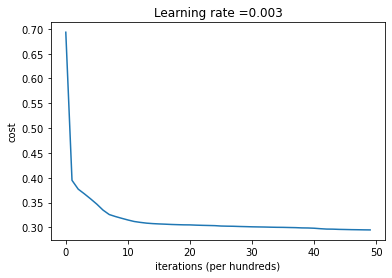

In [23]:
# np.random.seed(69)

X = train[features]
y = train[['bot']]

ss=StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# print(X_train)
X_train[features] = ss.fit_transform(X_train[features])
# print(type(X_train))
X_test[features]= ss.transform(X_test[features])
layer_dims=[13,10,5,1]

nn=NeuralNetwork()

params=nn.algorithm(X=X_train.T.to_numpy(),Y=y_train.T.to_numpy(),layer_dims=layer_dims,learning_rate=0.003,num_iterations=5000,print_cost=True,optimizer='adam')


In [24]:
pred=nn.predict(X_train.T.to_numpy(),y_train.T.to_numpy(),params)

Accuracy: 0.8625447112927951


In [25]:
pred=nn.predict(X_test.T.to_numpy(),y_test.T.to_numpy(),params)

Accuracy: 0.85
